In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, PredictionErrorDisplay
import seaborn as sns

In [20]:
df = pd.read_csv("../proc_data/ethylene_methane_reduced.csv")
X = df.drop('Conc_Meth', axis=1)
X = X.drop('Conc_Eth',axis=1)
X = X.drop('Time',axis=1)
y = df['Conc_Meth']
print(df.head())

   Unnamed: 0  feature1  feature2  feature3  Time  Conc_Meth  Conc_Eth
0           0 -2.504409  4.124434  4.110974  0.00        0.0       0.0
1           1 -2.508157  4.130002  4.111652  0.01        0.0       0.0
2           2 -2.506494  4.123014  4.020260  0.02        0.0       0.0
3           3 -2.526575  4.143718  4.018489  0.03        0.0       0.0
4           4 -2.496893  4.151425  4.219301  0.04        0.0       0.0


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
def train(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("R-squared (R2) Score:", r2)
    residuals = y_test - y_pred
    filtered_residuals = residuals[residuals < 2]
    filtered_residuals = filtered_residuals[filtered_residuals > -2] 
    mean_residual = np.mean(residuals)
    variance_residual = np.var(residuals)
    print(f"Mean of Residuals: {mean_residual}")
    print(f"Variance of Residuals: {variance_residual}")
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Step 2: Plot the histogram of filtered residuals in the first subplot
    axs[0].hist(filtered_residuals, bins=20, edgecolor='black')
    axs[0].set_title('Histogram of Filtered Residuals')
    axs[0].set_xlabel('Residual Value')
    axs[0].set_ylabel('Frequency')

    # Step 3: Plot the KDE of residuals in the second subplot
    sns.kdeplot(residuals, ax=axs[1])
    axs[1].set_title('Kernel Density Estimation of Residuals')
    axs[1].set_xlabel('Residual Value')
    axs[1].set_ylabel('Density')

    plt.tight_layout()
    plt.show()

### Linear Regression

Mean Squared Error: 2601.455518843546
R-squared (R2) Score: 0.5573706788522932
Mean of Residuals: -0.023177713062047654
Variance of Residuals: 2601.454981637164


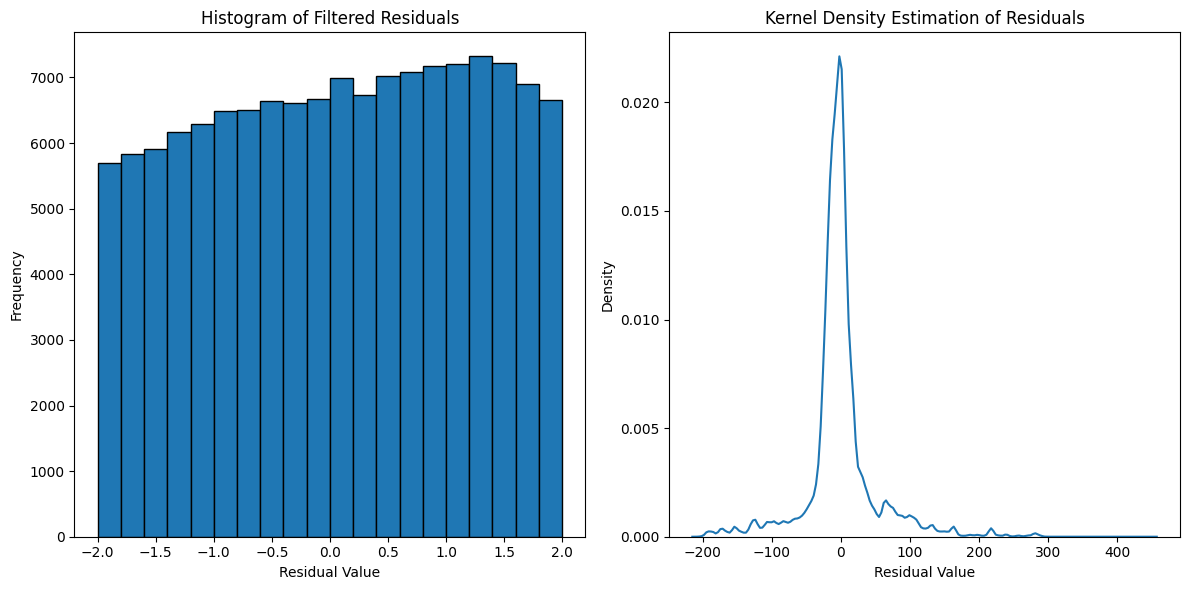

In [23]:
linear_model = LinearRegression()
train(linear_model)

### LASSO Regression

Mean Squared Error: 2602.7196490718525
R-squared (R2) Score: 0.5571555911443756
Mean of Residuals: -0.02507767884960631
Variance of Residuals: 2602.7190201818767


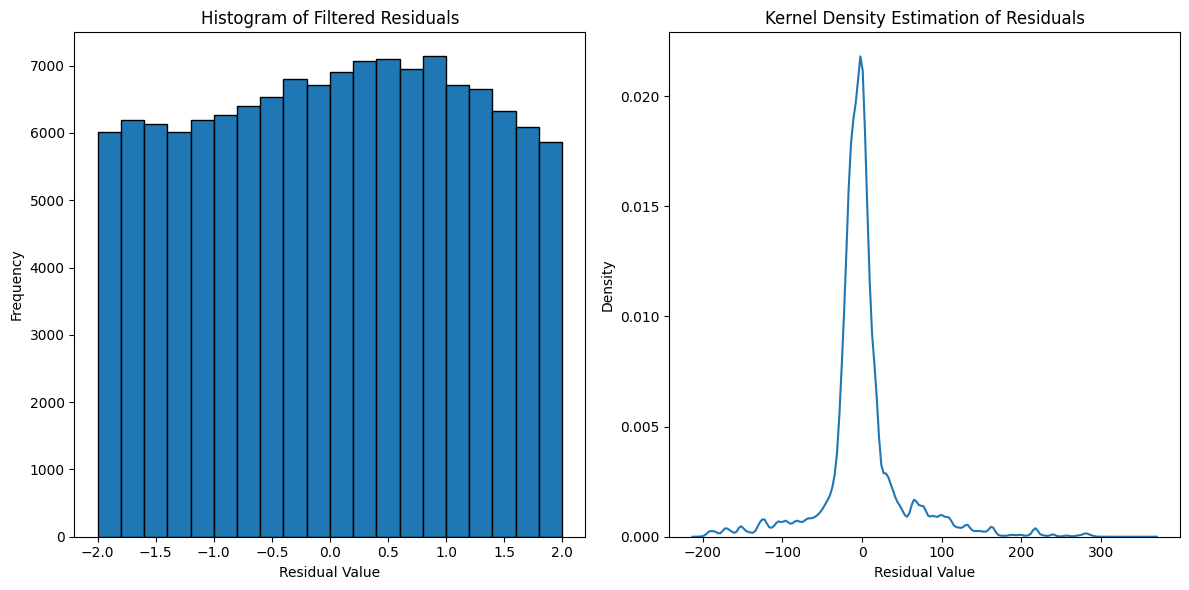

In [24]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)
train(lasso_model)

### Ridge Regression

Mean Squared Error: 2601.455517494609
R-squared (R2) Score: 0.5573706790818105
Mean of Residuals: -0.023177724882299487
Variance of Residuals: 2601.4549802876763


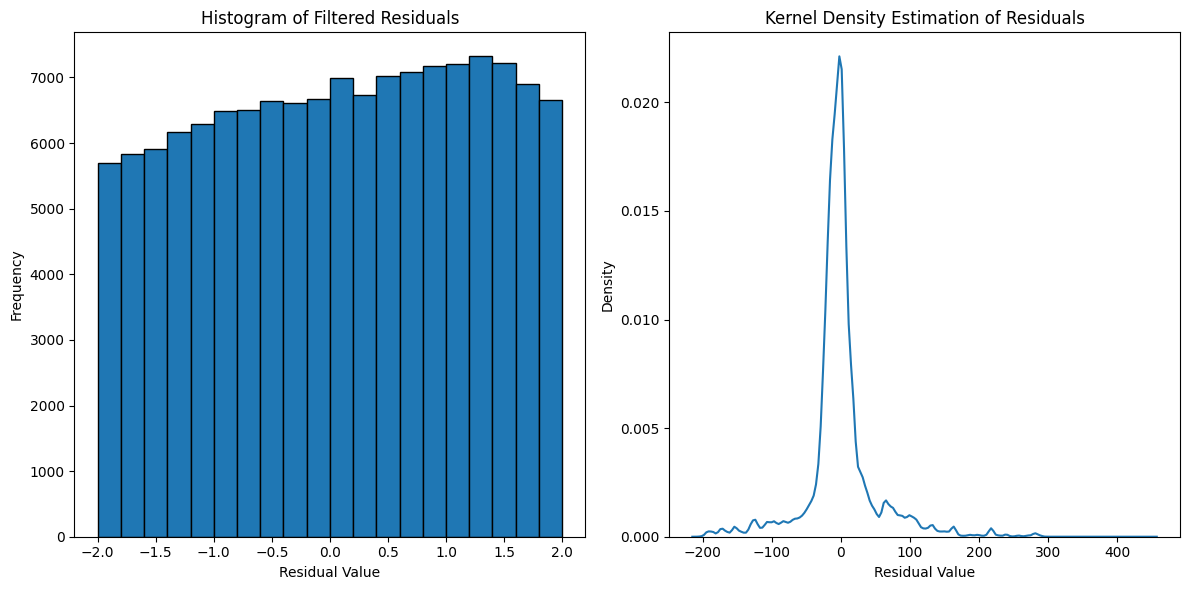

In [25]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
train(ridge_model)

### Decision Tree Regression

Mean Squared Error: 17.24098277251475
R-squared (R2) Score: 0.9970665020234865
Mean of Residuals: 0.031609419634271364
Variance of Residuals: 17.239983617105135


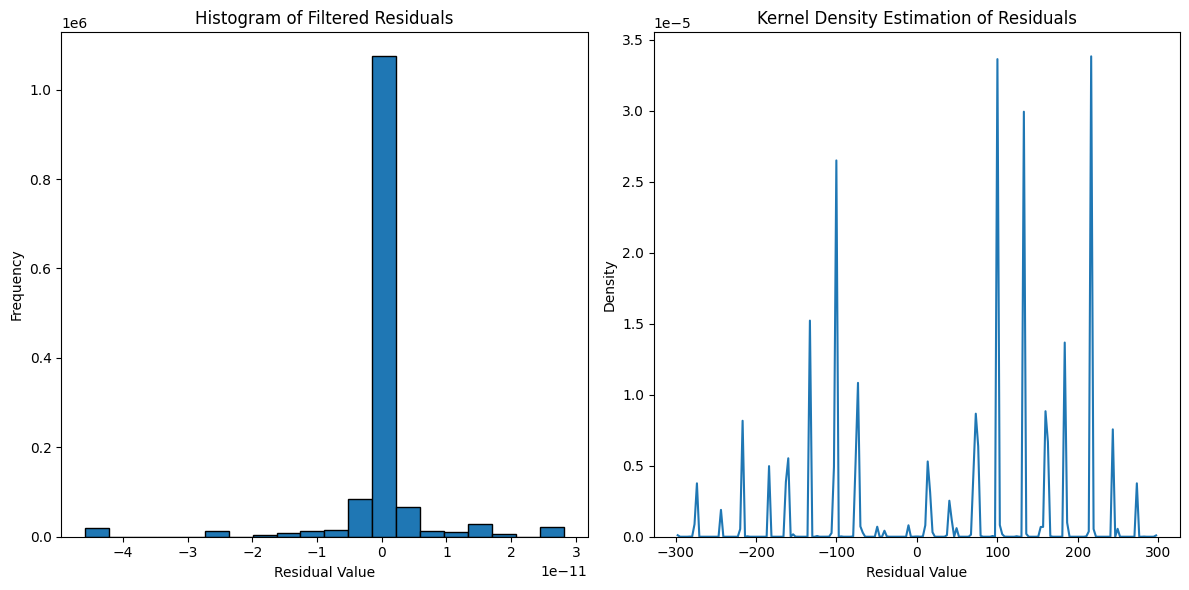

In [26]:
from sklearn import tree

decision_tree_model = tree.DecisionTreeRegressor()
train(decision_tree_model)

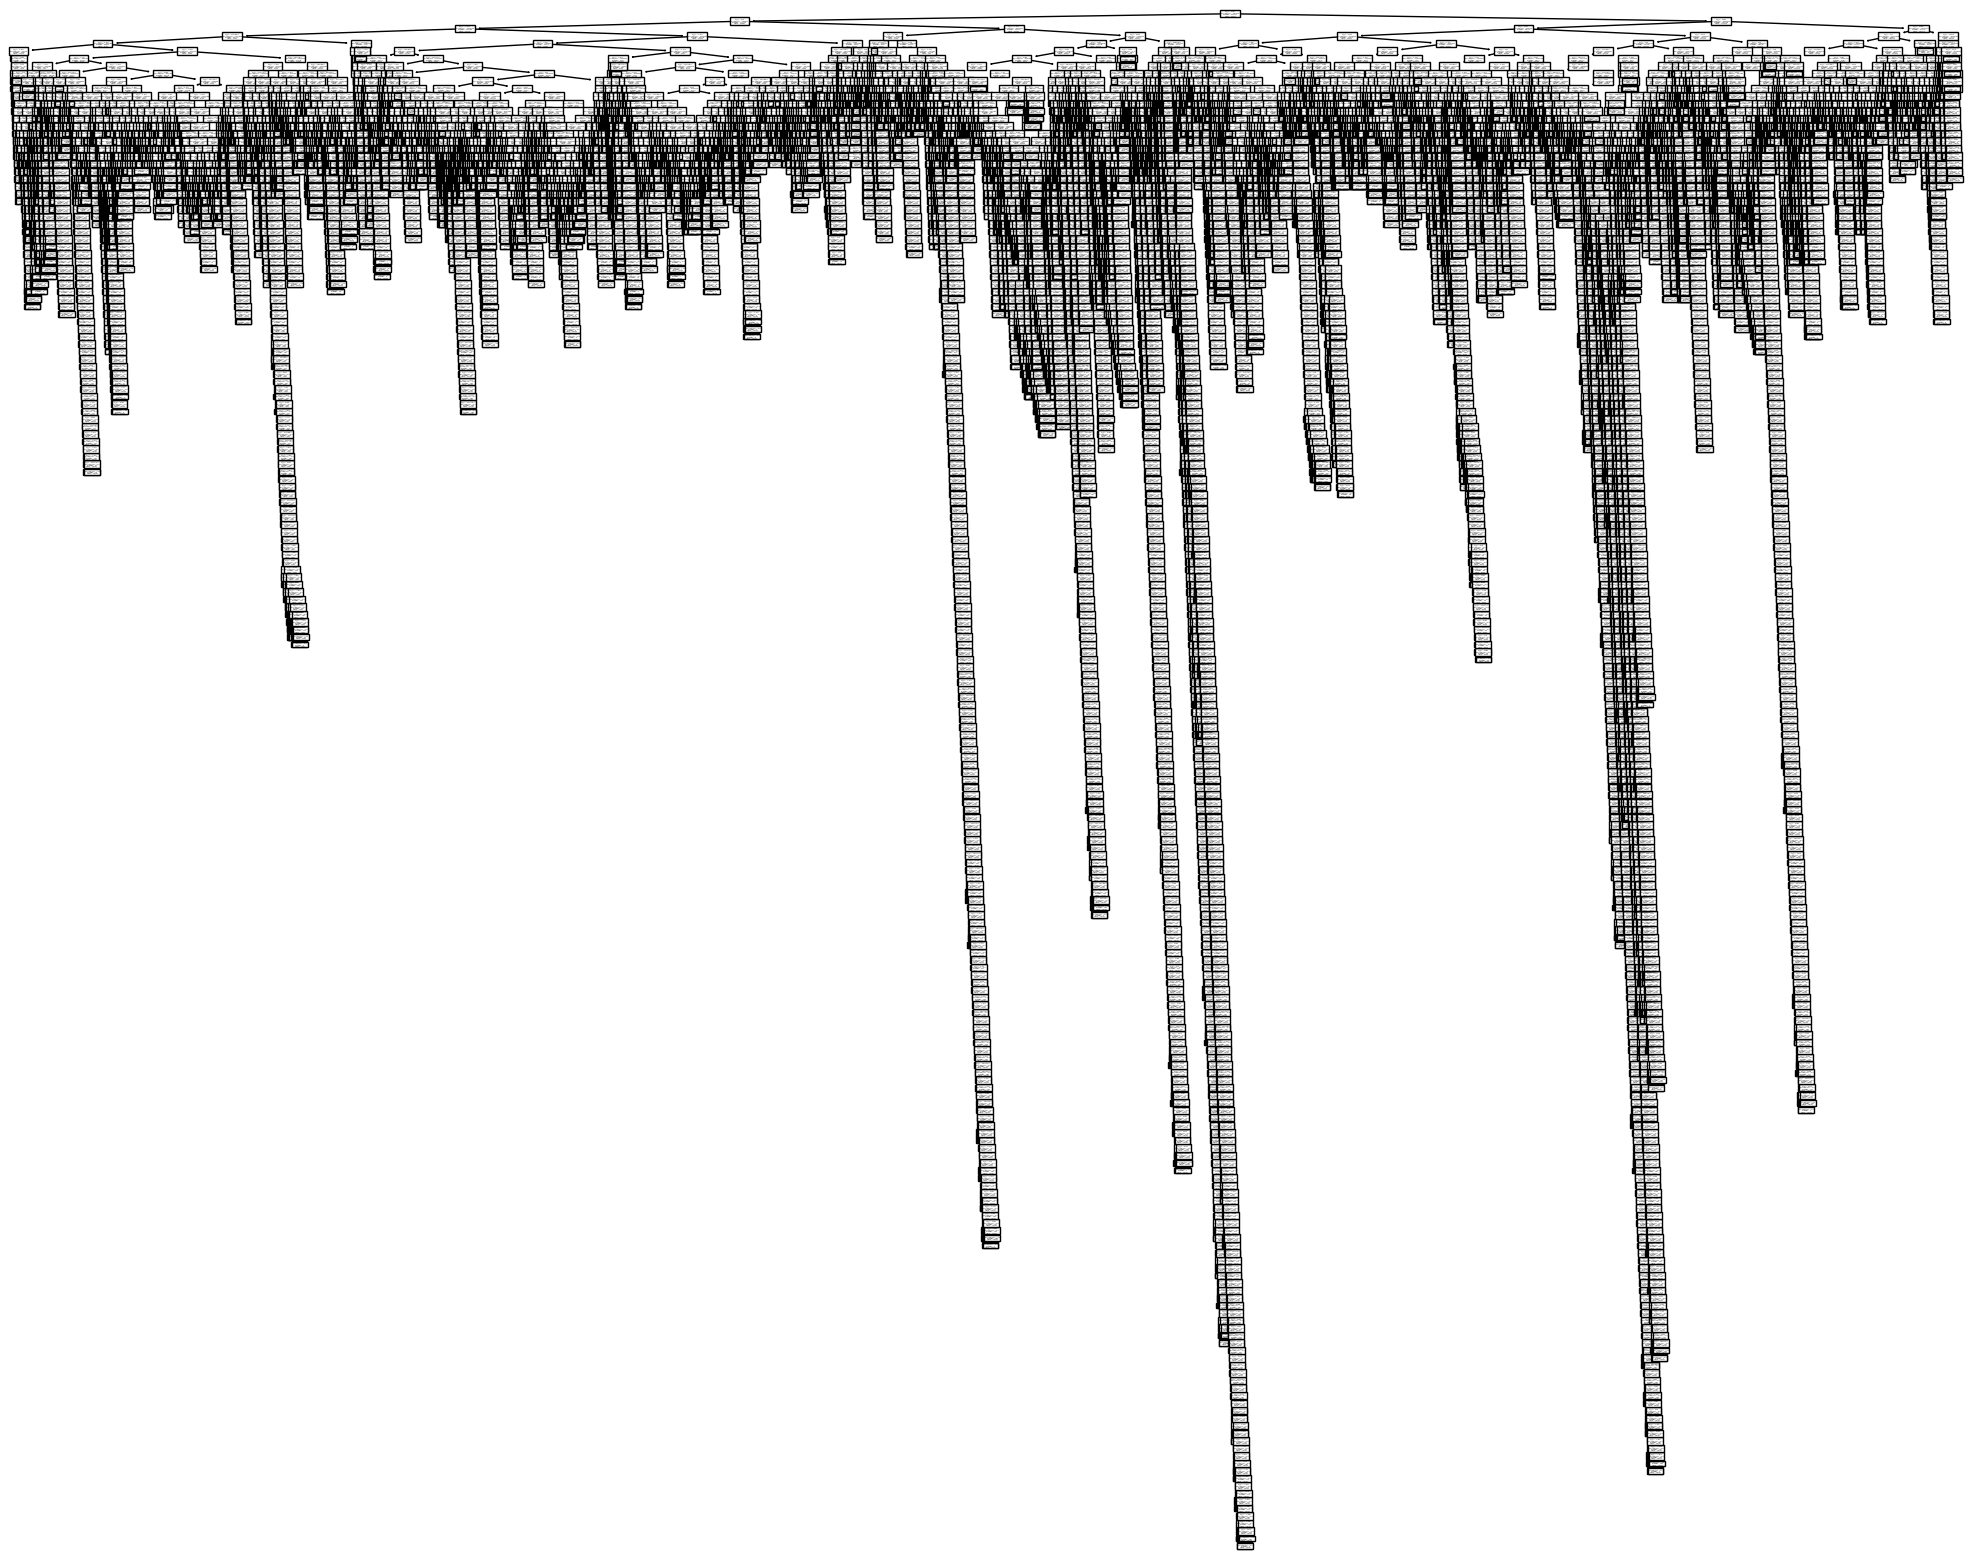

In [27]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(decision_tree_model)

In [28]:
depth = decision_tree_model.get_depth()
n_leaves = decision_tree_model.get_n_leaves()

print(f'The depth of the tree is {depth}')
print(f'The number of leaves is {n_leaves}')

The depth of the tree is 204
The number of leaves is 12703


### Polynomial Regression

Mean Squared Error: 3253.203667751983
R-squared (R2) Score: 0.44647781959677213
Mean of Residuals: -0.04106936488738859
Variance of Residuals: 3253.2019810592506


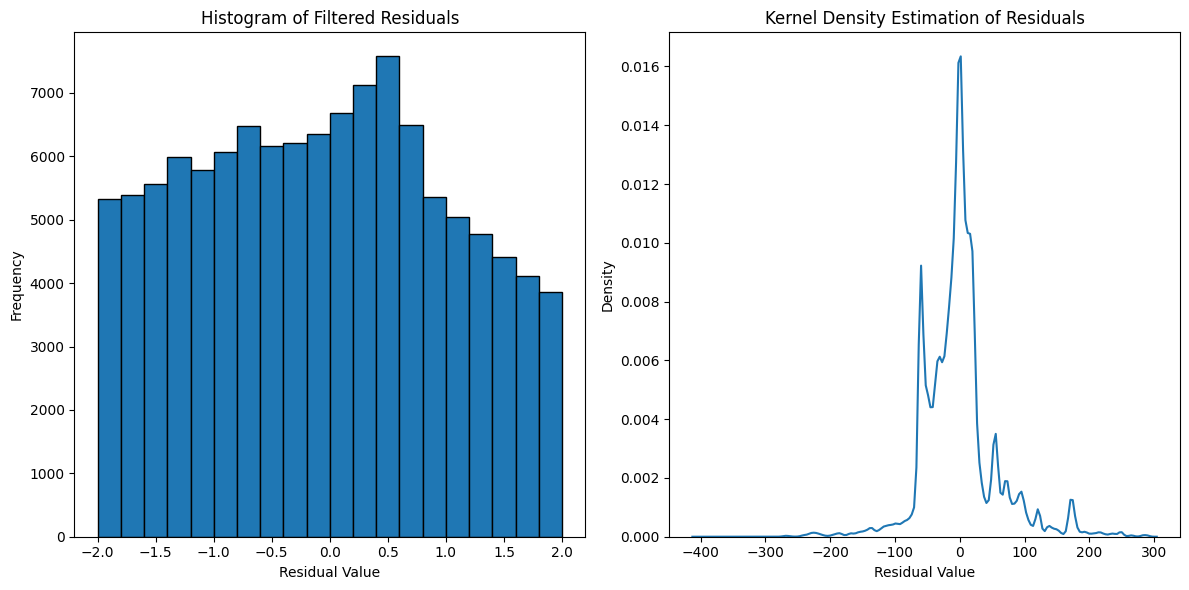

In [29]:
from sklearn.preprocessing import PolynomialFeatures

degree = 4  # You can change this to the desired polynomial degree
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
train(poly_model, X_train=X_train_poly, X_test=X_test_poly)